# 여러 데이터 로드 및 탐색

In [3]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 한글 폰트
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 그래프 마이너스 폰트 깨지는 문제 대처
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
import sklearn.datasets
import mglearn

## forge 데이터셋 -  이진분류용
- 인위적으로 만든 이진 분류 데이터셋

In [3]:
# 데이터셋 생성
X, y = mglearn.datasets.make_forge()

C:\Users\14Z960-GR30K\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


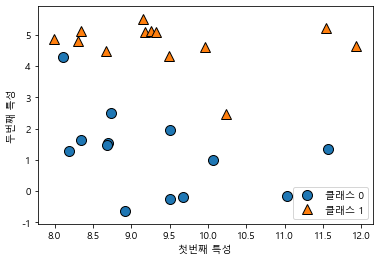

In [4]:
# 산점도 그리기
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.legend(['클래스 0','클래스 1'], loc=4)
plt.xlabel('첫번째 특성')
plt.ylabel('두번째 특성')
print('X.shape:', X.shape)

## wave 데이터셋 - 회귀 알고리즘용
- 인위적으로 만든 데이터셋
- 입력 특성 하나와 모델링할 타깃 변수를 가짐

Text(0, 0.5, '타깃')

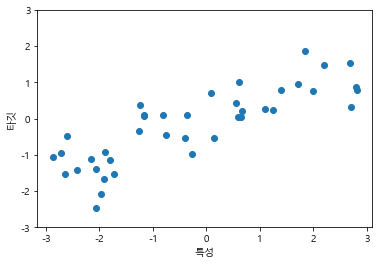

In [5]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel('특성')
plt.ylabel('타깃')

## cancer - 양성/악성
- skikit-learn에 있는 실제 데이터셋
- 유방암 종양의 임상 데이터를 기록해놓은 위스콘신 유방암 데이터셋
    - 양성: 해롭지 않은 종양
    - 악성: 암 종양

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('cancer.keys():\n', cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


## [참고] Bunch 객체
- dictionary와 비슷하지만, '점 표기법' 사용 가능
    - bunch['key'] 대신 bunch.key 사용 가능

In [7]:
'유방암 데이터의 형태:', cancer.data.shape   # cancer['data'].shape

('유방암 데이터의 형태:', (569, 30))

In [8]:
print('class별 샘플 개수:\n', {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})   # n: v <- 출력형태 지정의 한 종류일 뿐..

class별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [9]:
print('특성의 이름:\n', cancer.feature_names)

특성의 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [10]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

## boston - 보스턴 주택가격 데이터셋 (회귀 분석용)
- 범죄율, 찰스강 인접도, 고속도로 접근성 등의 정보를 이용해 주택 평균 가격을 예측하는 것

In [11]:
from sklearn.datasets import load_boston
boston = load_boston()
print('데이터의 형태:', boston.data.shape)

데이터의 형태: (506, 13)


### 특성 공학된 데이터셋 load
- 기존 13개의 특성 + 특성끼리 곱하여(상호작용) 의도적으로 확장한 데이터
    - 개별 특성은 물론 범죄율과 고속도로 접근성의 곱도 특성으로 생각한다는 뜻
    - 첫번째 특성으로 13개의 교차항 -> 두번째 특성에서 첫번째 특성을 제외한 12개의 교차항 -> ...  => 13+12+11+...+1=91   => 91+13(기존특성)=104
- 이처럼 특성을 유도해내는 것을 특성 공학(feature engineering)이라고 함

In [12]:
# load_extended_boston 함수 사용하여 불러들이기
X, y = mglearn.datasets.load_extended_boston()
print('X.shape:', X.shape)

X.shape: (506, 104)


# knn (k-최근접 이웃)
- 새로운 데이터 포인트에 대해 예측할 때는, 훈련 데이터셋에서 가장 가까운 k개의 데이터 포인트, 즉 '최근접 이웃'을 찾음
- 주요 매개변수는 데이터 포인트 사이의 거리를 재는 방법과 이웃의 수 2개
    - 기본 거리 재는 방법은 유클리디안 거리 방식
    - **이웃의 수(n_neighbors | k)**는 일반적으로 3 ~ 5개가 적당함
- **훈련 세트가 매우 크면(특성 수 또는 샘플 수가 큰 경우) 예측이 느려짐**
    - 많은 특성을 가진 데이터 셋에는 성능이 좋지 않고, 특성값 대부분이 0인 희소행렬 등의 데이터셋과는 특히 잘 작동하지 않음
- 데이터 전처리(특성 **스케일링하여 정규화**)가 중요함   
=> 결론: 사용하기 쉽고, 이해하기 쉽지만, **예측이 느리고 많은 특성을 처리하는 능력이 부족해 현업에서는 잘 쓰이지 않음**

## k 개수에 따른 예측 변화

### k = 1

C:\Users\14Z960-GR30K\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


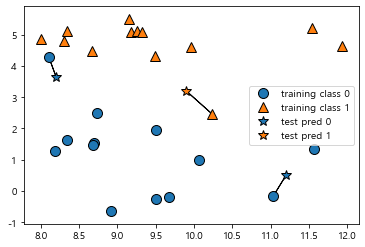

In [13]:
# forge 데이터셋 이용
mglearn.plots.plot_knn_classification(n_neighbors=1)

### k = 3
- 둘 이상의 이웃을 선택할 때는 레이블을 정하기 위해 투표를 함 (가장 빈번한 클래스 레이블로 예측)

C:\Users\14Z960-GR30K\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


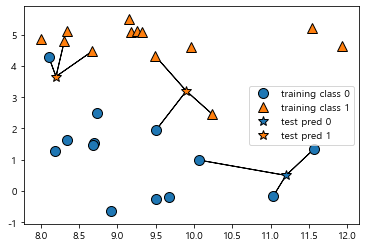

In [14]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

- 맨 왼쪽 예측이 k=1일때와 결과가 달라짐

## 알고리즘 적용

In [15]:
# 데이터셋 분리
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\14Z960-GR30K\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [16]:
# 모델 생성
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)   # k=3

In [17]:
# 학습
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [18]:
# 예측
print('테스트 세트 예측:', clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [19]:
# 평가
print('테스트 세트 정확도: {:.2f}'.format(clf.score(X_test, y_test)))   # 예측, 평가

테스트 세트 정확도: 0.86


## KNeighborsClassifier 분석 - 결정경계

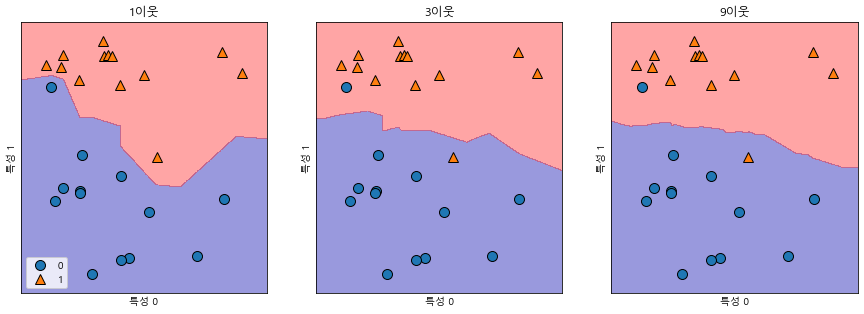

In [20]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

# k가 1,3,9일 때 결정경계
for n_neighbors, ax in zip([1,3,9], axes):
    # fit 메소드는 self오브젝트를 리턴함 -> 객체 생성과 fit 메소드를 한 줄에 쓸 수 있음
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title('{}이웃'.format(n_neighbors))
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend(loc=3)

- k의 개수를(이웃의 개수를) 늘릴 수록 결정 경계는 더 부드러워짐 (부드러운 경계는 더 단순한 모델을 의미함)
- 이웃을 적게 사용하면 모델의 복잡도가 높아지고, 많이 사용하면 복잡도는 낮아짐

## 모델의 복잡도와 일반화 사이의 관계 시각화 (유방암 데이터셋 사용)

In [21]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1 ~ 10까지 n_neighbors 적용
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))   # 예측, 평가
    # 일반화 정확도 저장 (test 세트 정확도 저장)
    test_accuracy.append(clf.score(X_test, y_test))

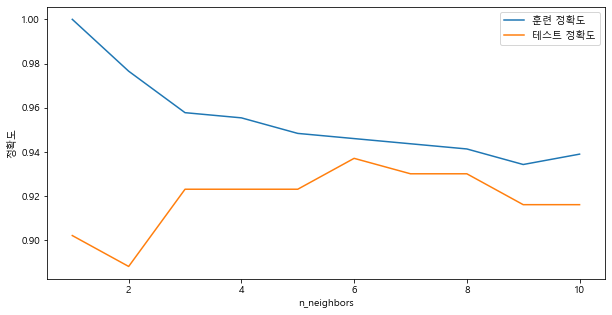

In [22]:
# 모델의 복잡도와 일반화 사이의 관계 시각화 (train 성능과 test 성능의 관계)
plt.figure(figsize=(10,5))
plt.plot(neighbors_settings, training_accuracy, label='훈련 정확도')
plt.plot(neighbors_settings, test_accuracy, label='테스트 정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')
plt.legend()

- k=6일 때 정확도가 가장 좋음
- k=1일때 모델이 너무 복잡해 훈련 정확도는 1이지만, test 정확도는 낮음
- 반대로 k=10일때는 모델이 너무 단순해 정확도는 그 전보다 더 나빠짐

## k-최근접 이웃 회귀
- k개의 이웃의 타깃값의 평균 (이웃을 한개만 지정하면, 가장 가까운 이웃의 타깃값)
    - weights 매개변수
        - uniform(기본값): np.mean 함수를 사용하여 단순 평균 계산
        - distance: 거리를 고려한 가중치 평균을 계산함

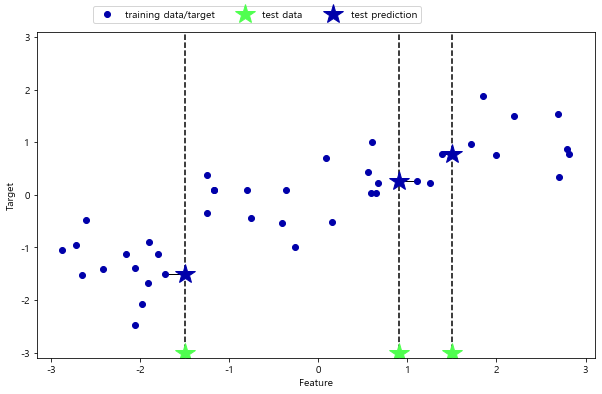

In [23]:
# wave data set 이용    
mglearn.plots.plot_knn_regression(n_neighbors=1)

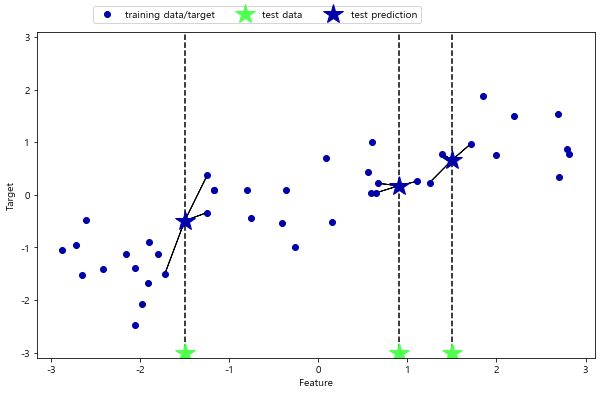

In [24]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

## 알고리즘 적용

In [25]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

In [26]:
# wave dataset -> train/test set으로 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [27]:
# 이웃의 수(k) = 3으로 해서 객체 생성
reg = KNeighborsRegressor(n_neighbors=3)

# 학습
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [28]:
# 예측
print('테스트 세트 예측:\n', reg.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [29]:
# 평가
# score 메서드 사용시, 회귀일 때 R^2(결정계수)값을 반환함 : 회귀 모델의 예측의 적합도를 측정한 것
# 일반적으로 0~1사이 값을 가지며, 음수 값이 될 수도 있음(예측과 타깃이 상반된 경향을 가지는 경우)
print('테스트 세트 R^2: {:.2f}'.format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


## KNeighborsRegressor 분석 - 모델 복잡도와 일반화 사이의 관계

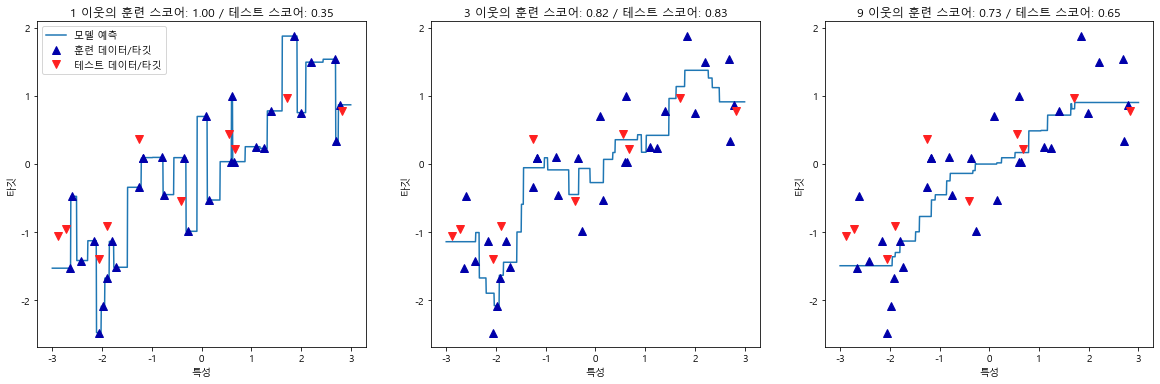

In [30]:
fig, axes = plt.subplots(1,3, figsize=(20,6))
# -3과 3 사이에 1,000개의 데이터 포인트 생성
line = np.linspace(-3,3,1000).reshape(-1,1)    # 1차원 데이터셋

for n_neighbors, ax in zip([1,3,9], axes):
    # k = 1,3,9일 때의 예측
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))  # 실제값, 예측값을 이은 선
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)  # train point
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)   # test point
    
    ax.set_title('{} 이웃의 훈련 스코어: {:.2f} / 테스트 스코어: {:.2f}'.format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel('특성')
    ax.set_ylabel('타깃')
axes[0].legend(['모델 예측','훈련 데이터/타깃','테스트 데이터/타깃'], loc='best')

- k=1일 때, 예측값이 훈련 데이터 포인트를 모두 지나감
- 이웃(k)을 많이 사용하면, 훈련 데이터에는 잘 안 맞을 수 있지만 더 안정된 예측을 얻게됨(일반화 성능 더 좋아짐)